# 2D IR Spectra

In [1]:
import os
from Irspec2d import *
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Load data

In [2]:
mol = 'GAAP' # used to name the plots

path = 'data/GAAP_onlyCO'
#path = 'data/uracil_deu_explD2O/'
freqmat = np.loadtxt('%s/freqsmat.txt' %(path))
transmat = np.load('%s/transmat.npy' %(path))


newmin = 1600
newmax = 1850
steps = 500

saveplot = True
invertaxis = True

harm = None
if os.path.isfile('%s/transmatharm.npy' %(path)) and os.path.isfile('%s/freqsmatharm.txt' %(path)):
    harm = True                 
    
    freqmath = np.loadtxt('%s/freqsmatharm.txt' %(path))
    transmath = np.load('%s/transmatharm.npy' %(path))

### Calculate peaks

In [3]:
anharmcalc = calc_2dirsimple(freqmat,transmat)
exc, emi, ble = anharmcalc.calc_all_2d_process()

#harm = None
if harm:
    print()
    harmcalc = calc_2dirsimple(freqmath,transmath)
    exch, emih, bleh = harmcalc.calc_all_2d_process()

### Plot position of peaks

In [4]:
xmin = spectrum().find_xmin(freqmat) - 50
xmax = spectrum().find_xmax(freqmat,3) + 50
print(xmin,xmax)
#spectrum().plot_2dspectrum_dots(xmin,xmax,exc,emi,ble)

if harm:
    xminh = spectrum().find_xmin(freqmath) - 50
    xmaxh = spectrum().find_xmax(freqmath,3) + 50
    print(xminh,xmaxh)
    #spectrum().plot_2dspectrum_dots(xminh,xmaxh,exch,emih,bleh)

1660.121418974405 1795.5811268916495
1666.7795080862206 1809.221885087968


### Plot 2D spectrum

In [5]:
lssmall = 9
lsmedium = 12
lslarge = 18

x,y,z = spectrum().calc_lorentz_spectrum2d(exc,emi,ble,newmin,newmax,steps)
z_val = spectrum().find_minmax(z)
ifreqs = anharmcalc.set_initial_freqs()
print(ifreqs)

if harm:
    xh,yh,zh = spectrum().calc_lorentz_spectrum2d(exch,emih,bleh,newmin,newmax,steps)
    z_valh = spectrum().find_minmax(zh)
    ifreqsh = harmcalc.set_initial_freqs()
    print(ifreqsh)

[1710.12141897 1721.7055201  1745.58112689]
[1716.77950809 1728.39759779 1759.22188509]


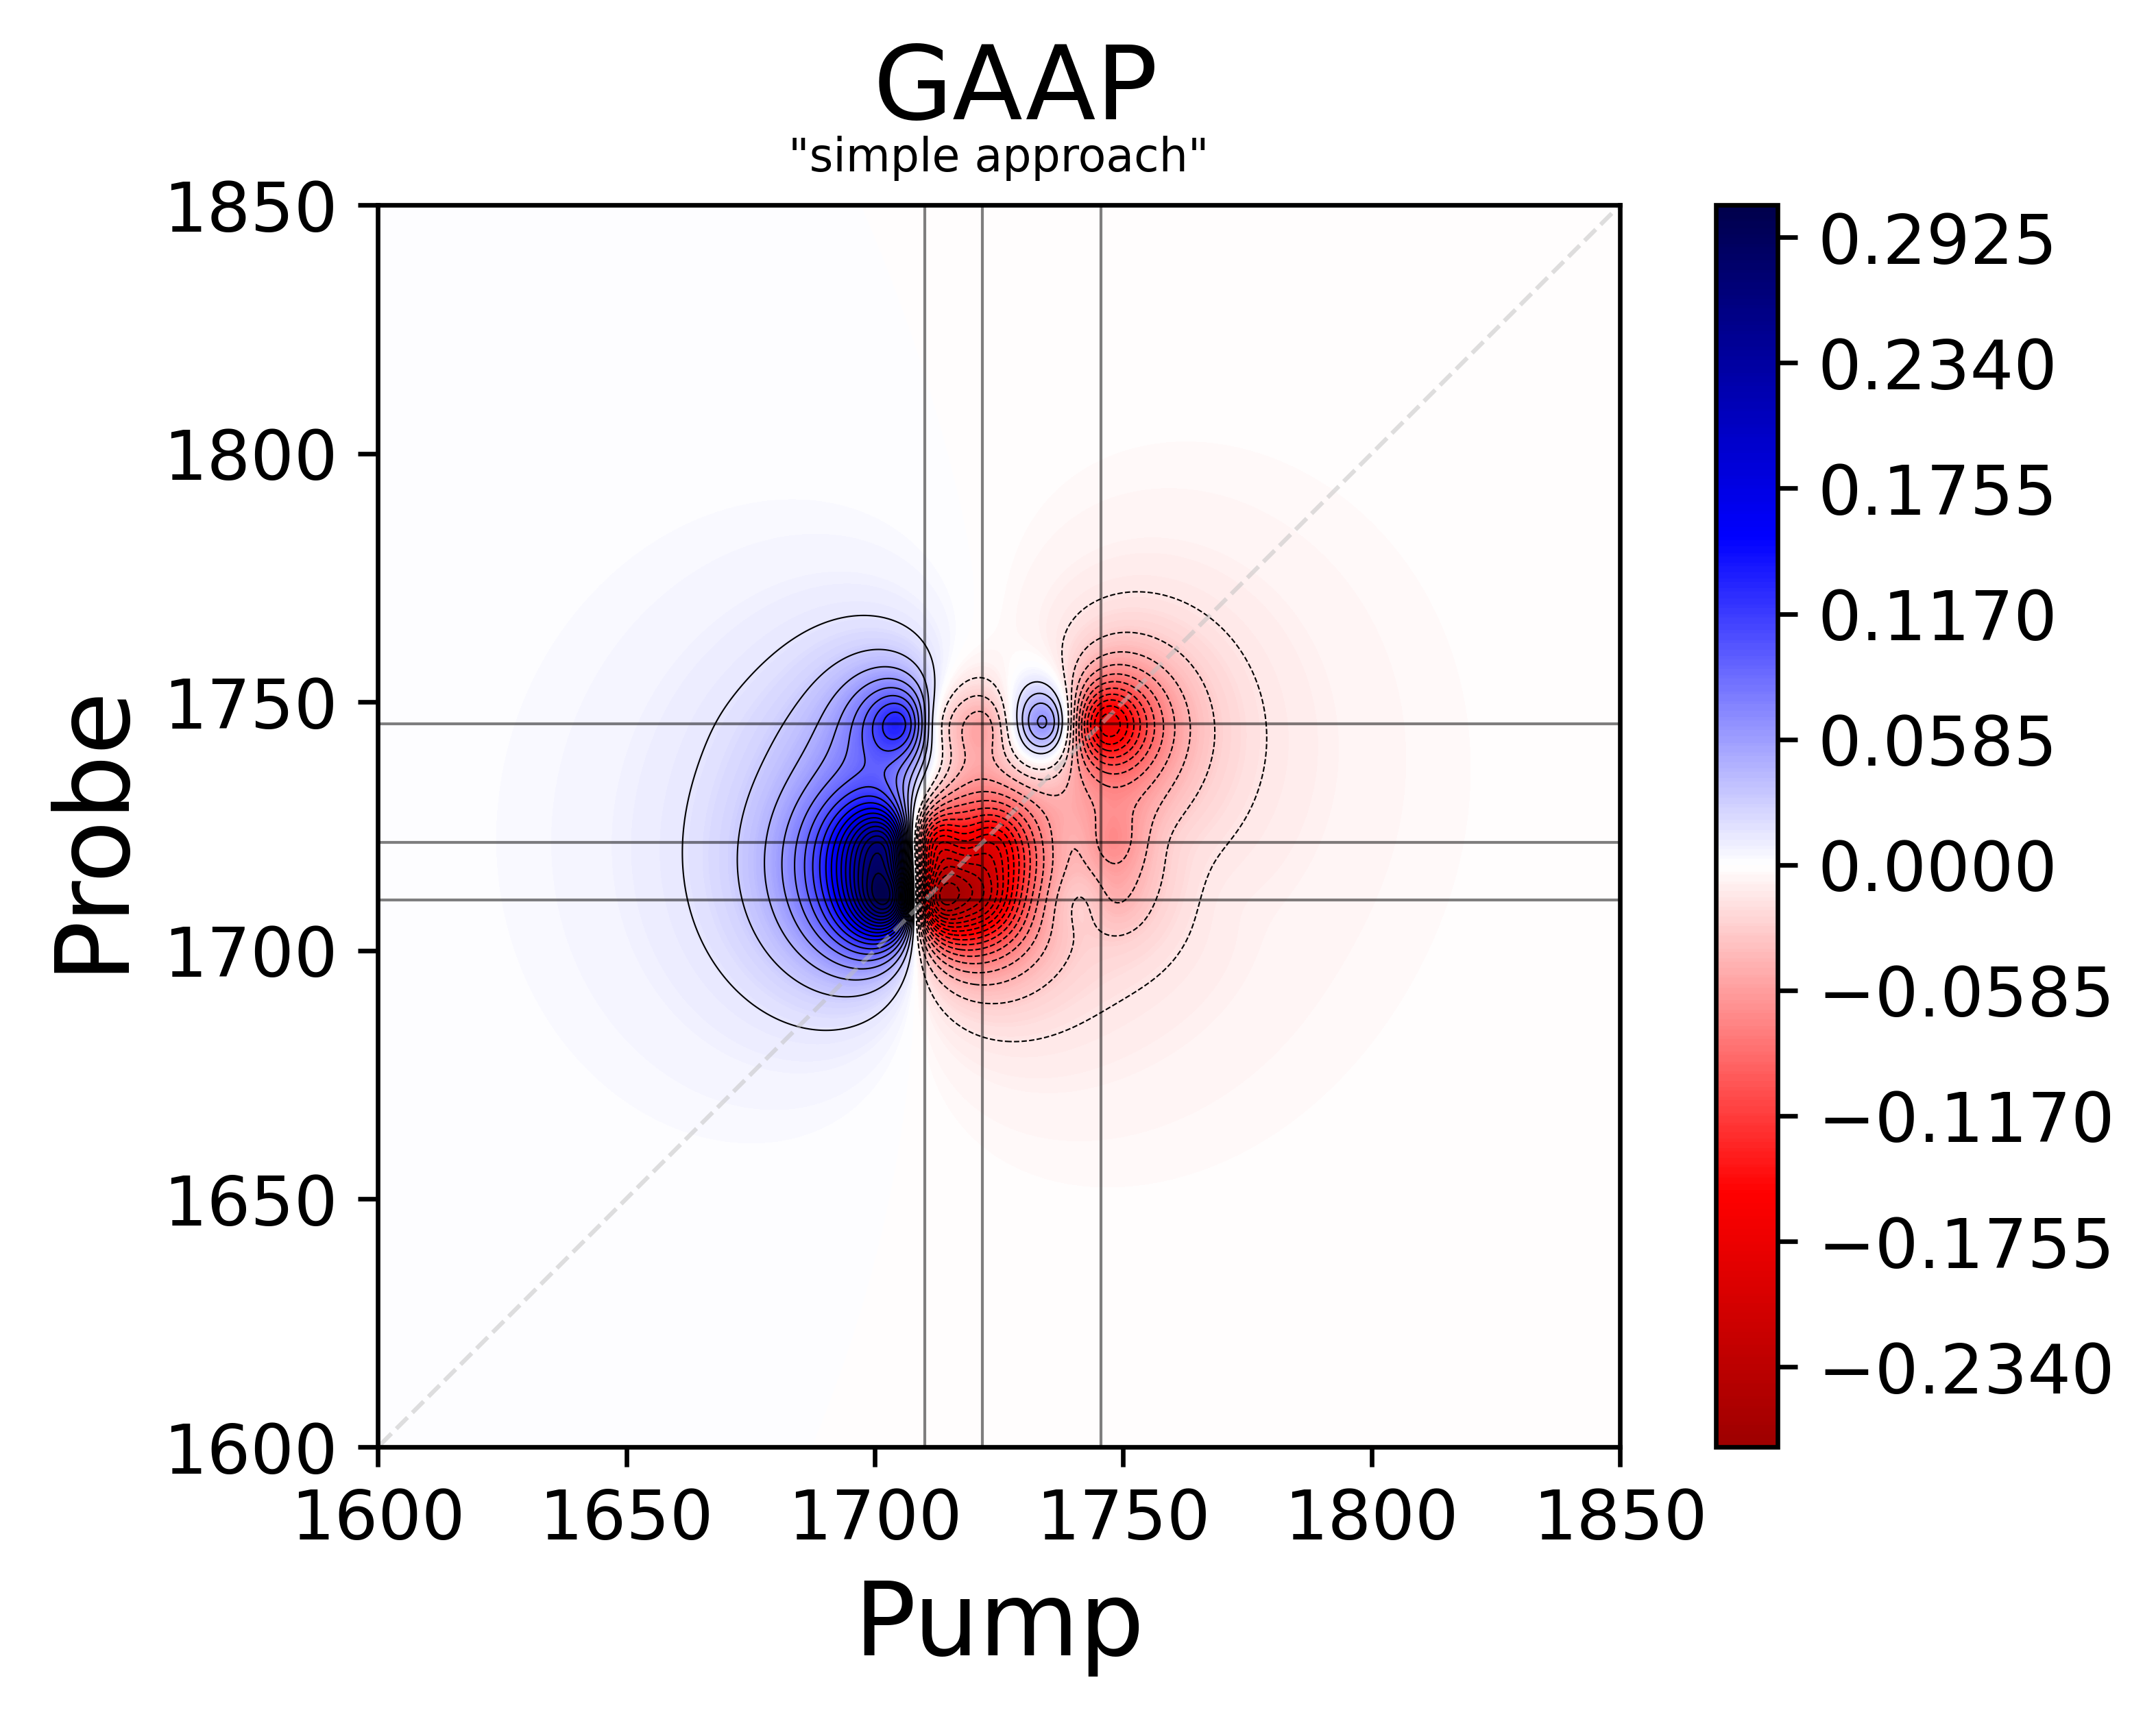

In [6]:
fig, ax = plt.subplots(dpi=600)

plt.suptitle(mol,fontsize=lslarge)
plt.title('"simple approach"',fontsize=8)

plt.vlines(ifreqs, newmin, newmax, colors='k', linewidth=.5, alpha=.5)
plt.hlines(ifreqs, newmin, newmax, colors='k', linewidth=.5, alpha=.5)
plt.plot([0,newmax], [0,newmax], ls="--", c="0.75", linewidth=.75, alpha=.5)

#plt.grid(True)
ax.set_aspect(1./ax.get_data_ratio())

if invertaxis:
    fig = plt.contourf(x,y,z.transpose(), 500, alpha=1, cmap=plt.cm.seismic_r, vmax=z_val, vmin=-z_val)
    CS = plt.contour(x,y,z.transpose(), spectrum().set_line_spacing(abs(z.max()),20),colors='k',linewidths=.25)
else:
    fig = plt.contourf(x,y,z, 500, alpha=1, cmap=plt.cm.seismic_r, vmax=z_val, vmin=-z_val)
    CS = plt.contour(x,y,z, spectrum().set_line_spacing(abs(z.max()),20),colors='k',linewidths=.25)

cbar = plt.colorbar(fig)
cbar.ax.tick_params(labelsize=lsmedium)
ax.tick_params(labelsize=lsmedium)
if invertaxis:
    plt.xlabel('Pump', fontsize=lslarge)
    plt.ylabel('Probe', fontsize=lslarge)
else:
    plt.xlabel('Probe', fontsize=lslarge)
    plt.ylabel('Pump', fontsize=lslarge)
plt.xlim(newmin,newmax)
plt.ylim(newmin,newmax)

#plt.plot(ble[0],ble[1], "x", color='gold', label='bleaching', markersize=10)
#plt.plot(exc[0],exc[1], "bx", label='excitation', markersize=5)
#plt.plot(emi[0],emi[1], "gx", label='stim. emiss.', markersize=5)

if saveplot:
    if invertaxis:
        plt.savefig('%s_anharm_lorentz_.png' %(mol),bbox_inches='tight')
    else:
        plt.savefig('%s_anharm_lorentz.png' %(mol),bbox_inches='tight')
#plt.savefig('%s_anharm_lorentz.png' %(mol),bbox_inches='tight')

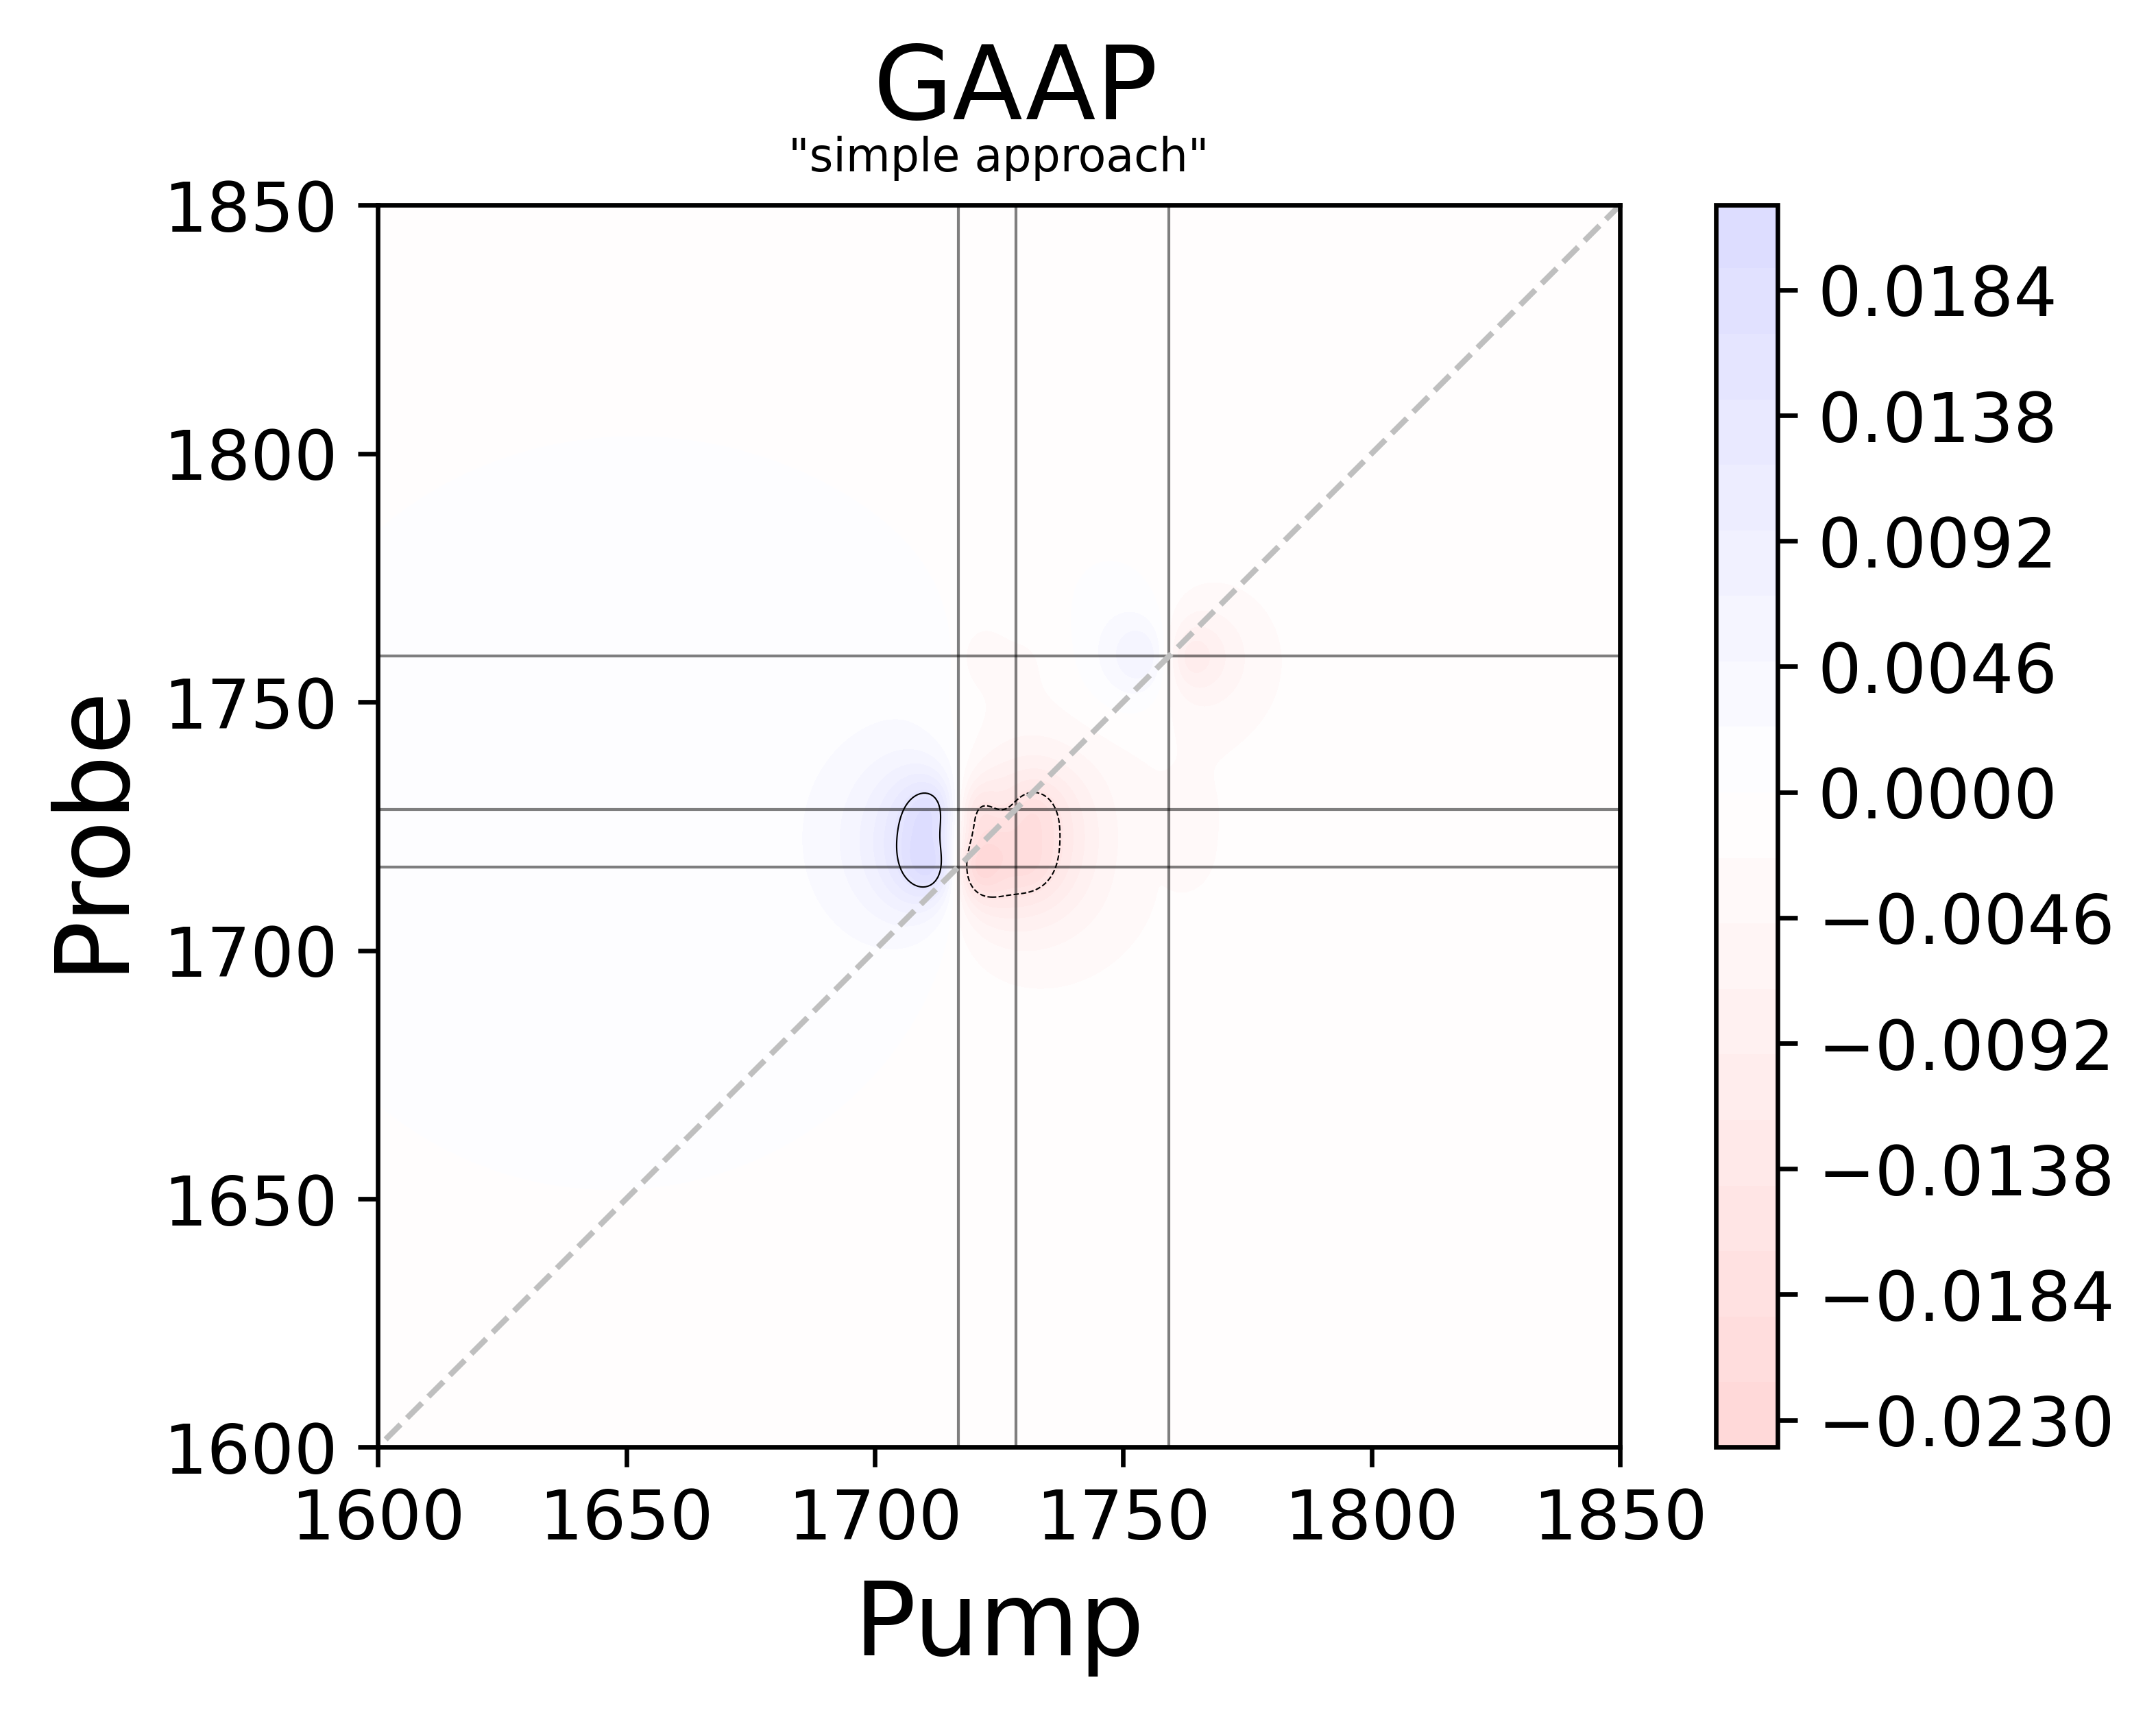

In [7]:
if harm:
    fig, ax = plt.subplots(dpi=600)

    plt.suptitle(mol,fontsize=lslarge)
    plt.title('"simple approach"',fontsize=8)
    
    plt.vlines(ifreqsh, newmin, newmax, colors='k', linewidth=.5, alpha=.5)
    plt.hlines(ifreqsh, newmin, newmax, colors='k', linewidth=.5, alpha=.5)
    plt.plot([0,newmax], [0,newmax], ls="--", c="0.75", linewidth=1)

    #plt.grid(True)
    ax.set_aspect(1./ax.get_data_ratio())

    if invertaxis:
        fig = plt.contourf(xh,yh,zh.transpose(), 500, alpha=1, cmap=plt.cm.seismic_r, vmax=z_val, vmin=-z_val)
        CS = plt.contour(xh,yh,zh.transpose(), spectrum().set_line_spacing(abs(z.max()),20),colors='k',linewidths=.25)
    else:
        fig = plt.contourf(xh,yh,zh, 500, alpha=1, cmap=plt.cm.seismic_r, vmax=z_val, vmin=-z_val)
        CS = plt.contour(xh,yh,zh, spectrum().set_line_spacing(abs(z.max()),20),colors='k',linewidths=.25)

    cbar = plt.colorbar(fig)
    cbar.ax.tick_params(labelsize=lsmedium)
    ax.tick_params(labelsize=lsmedium)
    if invertaxis:
        plt.xlabel('Pump', fontsize=lslarge)
        plt.ylabel('Probe', fontsize=lslarge)
    else:
        plt.xlabel('Probe', fontsize=lslarge)
        plt.ylabel('Pump', fontsize=lslarge)
    plt.xlim(newmin,newmax)
    plt.ylim(newmin,newmax)

    #plt.plot(bleh[0],bleh[1], "x", color='gold', label='bleaching', markersize=10)
    #plt.plot(exch[0],exch[1], "bx", label='excitation', markersize=5)
    #plt.plot(emih[0],emih[1], "gx", label='stim. emiss.', markersize=5)

    if saveplot:
        if invertaxis:
            plt.savefig('%s_harm_lorentz_.png' %(mol),bbox_inches='tight')
        else:
            plt.savefig('%s_harm_lorentz.png' %(mol),bbox_inches='tight')